In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
 cd /content/gdrive/My Drive/CNN

/content/gdrive/My Drive/자료분석특론/프로젝트


# 데이터 읽기 및 폴더 나누기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE) # default는 512
        # img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_AREA)
        if img is not None:
            images.append(img)
    return images

In [ ]:
folder = "./COVID_CT/Not_Infected"
n_infected = load_images_from_folder(folder)

In [ ]:
folder = "./COVID_CT/Infected"
infected = load_images_from_folder(folder)

In [ ]:
# 랜덤하게
import random
random.seed(12345)

random.shuffle(n_infected)
random.shuffle(infected)

In [ ]:
# test(110, 100) - 20%, validate(55, 50)-10%, train(395, 351)-70% 비율

In [ ]:
# test(110, 100) - 20%, validate(55, 50)-10%, train(395, 351)-70% 비율

ntr = round(550*0.7)
nval = round(550*0.1)
nte = round(550*0.2)

itr = round(501*0.7)
ival = round(501*0.1)
ite = round(501*0.2)

In [ ]:
covid_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW'
os.mkdir(covid_dir)

train_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW/train'
vali_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW/validate'
test_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW/test'

os.mkdir(train_dir)
os.mkdir(vali_dir)
os.mkdir(test_dir)

In [ ]:
train_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW/train/Infected'
vali_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW/validate/Infected'
test_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW/test/Infected'

os.mkdir(train_dir)
os.mkdir(vali_dir)
os.mkdir(test_dir)

In [ ]:
train_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW/train/n_Infected'
vali_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW/validate/n_Infected'
test_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW/test/n_Infected'

os.mkdir(train_dir)
os.mkdir(vali_dir)
os.mkdir(test_dir)

In [ ]:
import os, shutil

def ninfected_images_to_folder(n_infected):
    train_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW/train/n_Infected/'
    vali_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW/validate/n_Infected/'
    test_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW/test/n_Infected/'

    for i in range(len(n_infected)):
        if i in range(0,ntr+1):
            fname = '{}.jpg'.format(i)
            cv2.imwrite(os.path.join(str(train_dir + fname)), n_infected[i])
            cv2.waitKey(0)
        elif i in range(ntr+1,ntr+nval+1):
            fname = '{}.jpg'.format(i)
            cv2.imwrite(os.path.join(str(vali_dir + fname)), n_infected[i])
            cv2.waitKey(0)
        else:
            fname = '{}.jpg'.format(i)
            cv2.imwrite(os.path.join(str(test_dir + fname)), n_infected[i])
            cv2.waitKey(0)

In [ ]:
import os, shutil

def infected_images_to_folder(infected):
    train_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW/train/Infected/'
    vali_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW/validate/Infected/'
    test_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW/test/Infected/'

    for i in range(len(infected)):
        if i in range(0,itr+1):
            fname = '{}.jpg'.format(i)
            cv2.imwrite(os.path.join(str(train_dir + fname)), infected[i])
            cv2.waitKey(0)
        elif i in range(itr+1,itr+ival+1):
            fname = '{}.jpg'.format(i)
            cv2.imwrite(os.path.join(str(vali_dir + fname)), infected[i])
            cv2.waitKey(0)
        else:
            fname = '{}.jpg'.format(i)
            cv2.imwrite(os.path.join(str(test_dir + fname)), infected[i])
            cv2.waitKey(0)

In [ ]:
ninfected_images_to_folder(n_infected)

In [ ]:
infected_images_to_folder(infected)

In [ ]:
# 길이 h*w 아닌거 체크, 없음

# for i in range(0,len(n_infected)):
#     h,w = n_infected[i].shape
#     if h*w != 128*128:
#         print('nop')

In [ ]:
# Train 랜덤 25개 출력
def plot_images_sample(X):
    plt.figure(figsize=(8,8))
    rand_indicies = np.random.randint(len(X), size=25)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = rand_indicies[i]
        # plt.imshow(, cmap='Greys', interpolation='nearest') cmap=plt.cm.binary  # np.squeeze(X)
        plt.imshow(np.array(X[index]), cmap='Greys')
    plt.show()

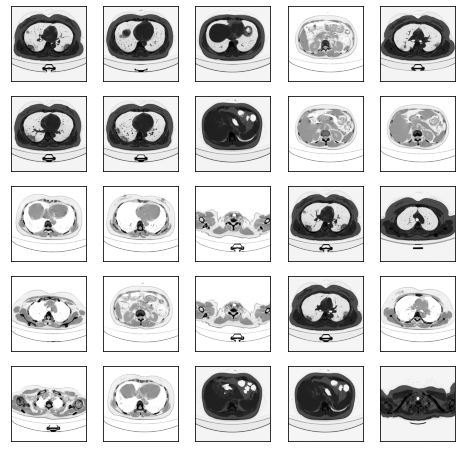

In [ ]:
plot_images_sample(n_infected)

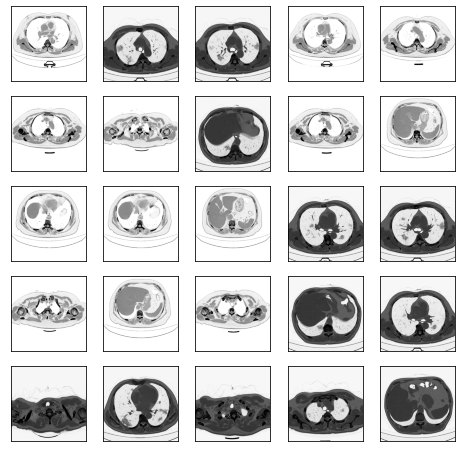

In [ ]:
plot_images_sample(infected)

# 데이터 읽기

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW/train'
vali_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW/validate'
test_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW/test'

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (256, 256),
    batch_size = 30,
    class_mode = 'binary',
    color_mode='grayscale'
)

Found 738 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    vali_dir,
    target_size = (256, 256),
    batch_size = 30,
    class_mode = 'binary',
    color_mode='grayscale'
)

Found 105 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (256, 256),
    batch_size = 30,
    class_mode = 'binary',
    color_mode='grayscale'
)

Found 208 images belonging to 2 classes.


# CNN0

In [ ]:
IMAGE_ROWS = 256
IMAGE_COLS = 256
BATCH_SIZE = 30
IMAGE_SHAPE = (IMAGE_ROWS,IMAGE_COLS,1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=IMAGE_SHAPE))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 516128)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 516128)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                16516128  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 16,516,481
Trainable params: 16,516,481
Non-trainable params: 0
__________________________________________

In [ ]:
from tensorflow.keras import optimizers

model1.compile(optimizer=optimizers.Adam(learning_rate=1e-4), # 'rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

In [ ]:
history = model1.fit_generator(train_generator, steps_per_epoch=1, epochs=10, validation_data = validation_generator, validation_steps = 1)

Epoch 1/10
Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6980 - acc: 0.3667 - val_loss: 0.9347 - val_acc: 0.5667
Epoch 2/10
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6200 - acc: 0.6333 - val_loss: 0.7424 - val_acc: 0.5667
Epoch 3/10
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6707 - acc: 0.5333 - val_loss: 0.5170 - val_acc: 0.7333
Epoch 4/10
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.5138 - acc: 0.8000 - val_loss: 0.4353 - val_acc: 0.9000
Epoch 5/10
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.4665 - acc: 0.9333 - val_loss: 0.3252 - val_acc: 1.0000
Epoch 6/10
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.3735 - acc: 1.0000 - val_loss: 0.2560 - val_acc: 1.0000
Epoch 7/10
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.2476 - acc: 1.0000 - val_loss: 0.1945 - val_acc: 1.0000
Epoch 8/10
Epoch 1/10
1/1 [=======

In [ ]:
tr_score = model1.evaluate_generator(train_generator)
print('Train Loss : {:.4f}'.format(tr_score[0]))
print('Train Accuracy : {:.4f}'.format(tr_score[1]))

Train Loss : 0.1220
Train Accuracy : 1.0000


In [ ]:
te_score = model1.evaluate(test_generator)
print('Test Loss : {:.4f}'.format(te_score[0]))
print('Test Accuracy : {:.4f}'.format(te_score[1]))

7/7 [==============================] - 3s 414ms/step - loss: 0.1324 - acc: 1.0000
Test Loss : 0.1324
Test Accuracy : 1.0000


## CNN1
- 과적합

In [ ]:
IMAGE_ROWS = 256
IMAGE_COLS = 256
BATCH_SIZE = 30
IMAGE_SHAPE = (IMAGE_ROWS,IMAGE_COLS,1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=IMAGE_SHAPE))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 246016)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [ ]:
from tensorflow.keras import optimizers

model1.compile(optimizer=optimizers.Adam(learning_rate=1e-4), # 'rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

In [ ]:
history = model1.fit_generator(train_generator, steps_per_epoch=1, epochs=10, validation_data = validation_generator, validation_steps = 1)

Epoch 1/10
Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.0079 - acc: 1.0000 - val_loss: 0.0151 - val_acc: 1.0000
Epoch 2/10
Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.0073 - acc: 1.0000 - val_loss: 0.0126 - val_acc: 1.0000
Epoch 3/10
Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.0076 - acc: 1.0000 - val_loss: 0.0102 - val_acc: 1.0000
Epoch 4/10
Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.0088 - acc: 1.0000 - val_loss: 0.0087 - val_acc: 1.0000
Epoch 5/10
Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.0078 - acc: 1.0000 - val_loss: 0.0078 - val_acc: 1.0000
Epoch 6/10
Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.0061 - acc: 1.0000 - val_loss: 0.0069 - val_acc: 1.0000
Epoch 7/10
Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 1.0000
Epoch 8/10
Epoch 1/10
1/1 [=======

In [ ]:
tr_score = model1.evaluate_generator(train_generator)
print('Train Loss : {:.4f}'.format(tr_score[0]))
print('Train Accuracy : {:.4f}'.format(tr_score[1]))

Train Loss : 0.0132
Train Accuracy : 1.0000


In [ ]:
te_score = model1.evaluate(test_generator)
print('Test Loss : {:.4f}'.format(te_score[0]))
print('Test Accuracy : {:.4f}'.format(te_score[1]))

7/7 [==============================] - 5s 778ms/step - loss: 0.0165 - acc: 1.0000
Test Loss : 0.0165
Test Accuracy : 1.0000


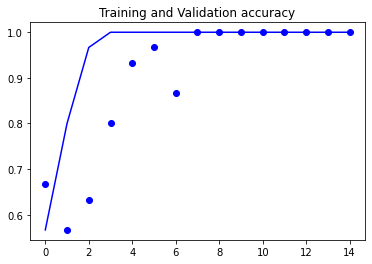

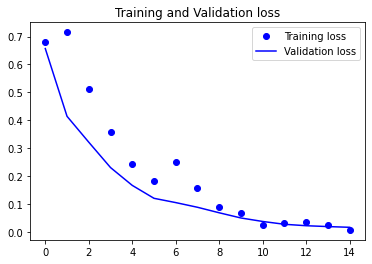

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

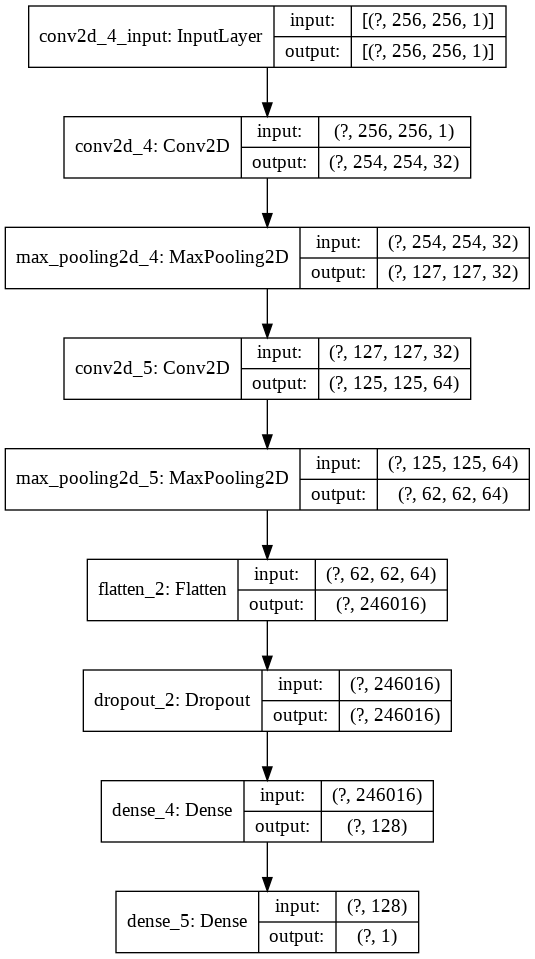

<Figure size 216x216 with 0 Axes>

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model1, to_file='CNN1.png', show_shapes=True)

과적합을 피하고 적당히 복잡한 일반적인 모델을 만들기 위해서,
1. train 비율을 낮추고 test 비율 늘리기
2. drop out 추가 및 마지막 dense node 수 줄이기
3. Augmentation 이용하기
4. 이미지 픽셀 줄이기 ??


# Augmentation Example

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
import os
from tensorflow.keras.preprocessing import image

train_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW/train'
one_fname = os.path.join(str(train_dir + '/Infected/202.jpg'))
img = image.load_img(one_fname, target_size=(258,258))

In [ ]:
one_fname = os.path.join(str(train_dir + '/Infected/202.jpg'))
img = image.load_img(one_fname, target_size=(258,258))

In [ ]:
x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)

In [ ]:
x.shape

(1, 258, 258, 3)

In [ ]:
    plt.figure(figsize=(8,8))
    rand_indicies = np.random.randint(len(X), size=25)
    for i in range(25):
        plt.subplot(5,5,i+1)

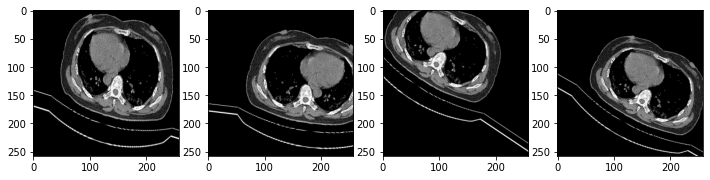

In [ ]:
i = 0
plt.figure(figsize=(12,6))

for batch in datagen.flow(x, batch_size=1):
    plt.subplot(1, 4,i+1)
    plt.imshow(image.array_to_img(batch[0]))

    i += 1
    if i % 4 == 0:
        break

plt.show()